<a href="https://colab.research.google.com/github/abhijeetraj22/TSF-GRIP_Tasks/blob/main/TSF_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP The Sparks Foundation(TSF)

##Task - 7 Stock Market Prediction using Numerical and Textual Analysis

#####In this task,
- Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)


##Steps -
 - Step 1 - Importing the Library
 - Step 2 - Importing the Dataset
 - Step 3 - Data Exploration
 - Step 4 - Define the Decision Tree Algorithm
 - Step 5 - Visualizing the Decision Tree

####Created by - Abhijeet Raj Modanwal


In [1]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pmdarima

     |████████████████████████████████| 5.5MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=cb057bc83f0dd9b68f3f7bd3bd87758df0e51ae678a0a82fe45b198e511aa6ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-zmbp9_cn/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 1.5MB 4.5MB/s 
     |████████████████████████████████| 2.1MB 18.6MB/s 
     |████████████████████████████████| 9.5MB 27.5MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


##Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
###STEP 1 - Importing the Library

In this step, we will import the Libraries.


In [2]:
# Importing libraries in Python
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "



###STEP 2 - Importing the Dataset

In [26]:
import yfinance as yf
bsesn_df = yf.download('^BSESN', start='2015-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [27]:
#first five rows of dataset
bsesn_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200
...,...,...,...,...,...,...
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800


In [28]:
bsesn_df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [29]:
#last five rows of dataset
bsesn_df.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800
2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,47746.218750,15600
2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900


In [30]:
bsesn_df.reset_index(inplace=True)

In [31]:
bsesn_df

,Date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200
...,...,...,...,...,...,...,...
1469,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
1470,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
1471,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800
1472,2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,47746.218750,15600


In [32]:
#bsesn_df.rename(columns={'Date': 'date'}, inplace = True)

In [33]:
#first five rows of dataset
bsesn_df.head()

,Date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


###STEP 3 - Data Exploration

In [34]:
#shape of dataset
bsesn_df.shape

(1474, 7)

In [35]:
#info of the dataset 
bsesn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1474 non-null   datetime64[ns]
 1   open      1474 non-null   float64       
 2   high      1474 non-null   float64       
 3   low       1474 non-null   float64       
 4   close     1474 non-null   float64       
 5   adjclose  1474 non-null   float64       
 6   volume    1474 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.7 KB


In [36]:
#summary of the data
bsesn_df.describe()

,open,high,low,close,adjclose,volume
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1.474000e+03
mean,32766.649284,32920.704153,32533.969631,32720.969157,32720.969157,2.302398e+05
std,5383.317285,5396.588432,5352.094624,5378.409081,5378.409081,1.941555e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,27886.702148,28029.185547,27717.564453,27877.024414,27877.024414,1.020000e+04
50%,32630.419922,32776.445312,32453.839844,32602.259766,32602.259766,1.340000e+04
75%,37230.690430,37411.762695,36908.123047,37120.468750,37120.468750,1.850000e+04
max,47789.031250,47896.968750,47602.121094,47751.328125,47751.328125,3.181510e+07


###STEP 4 - Visualizing the Dataset

In [40]:
# Extract date frame and plot closing stock price w.r.t time
bsesn_df['Date'] = pd.to_datetime(bsesn_df.Date,format='%Y-%m-%d')
bsesn_df.index = bsesn_df['Date']
bsesn_df.dropna(inplace=True)


In [41]:
bsesn_df.drop(['Date'], axis=1,inplace=True)

In [42]:
bsesn_df

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200
...,...,...,...,...,...,...
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800


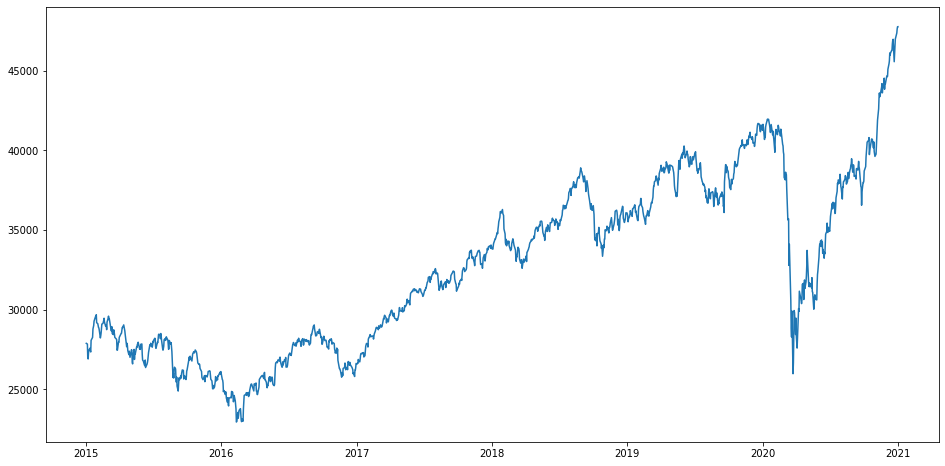

In [43]:
#plot
plt.figure(figsize=(16,8))
plt.plot(bsesn_df['close'], label='Close Price history')

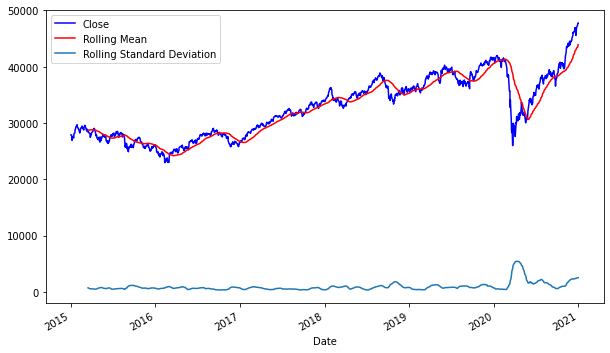

In [44]:
#Plotting moving average
close_data = bsesn_df['close']
ma = close_data.rolling(window = 50).mean()
std = close_data.rolling(window = 50).std()
#plotting
plt.figure(figsize=(10, 6))
bsesn_df['close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend();

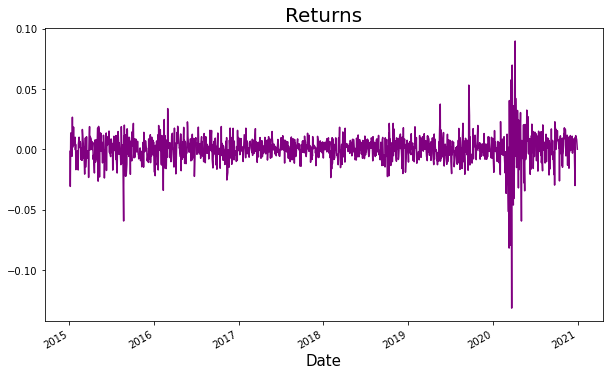

In [45]:
#Plotting returns
returns = close_data / close_data.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'purple')
plt.xlabel('Date',fontsize = 15)
plt.title("Returns",fontsize = 20);

In [46]:
#splitting the dataset
train_df = bsesn_df[:1000]
test_df = bsesn_df[1000:]

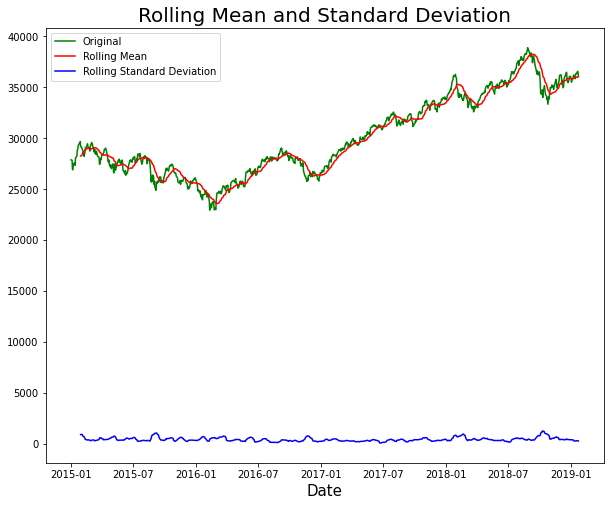

Results of dickey fuller test
ADF Test Statistic : -0.5913676380781218
p-value : 0.8729206808243344
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [47]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'g', label = 'Original')
 plt.plot(rolmean, color = 'r', label = 'Rolling Mean')
 plt.plot(rolstd, color = 'b', label = 'Rolling Standard Deviation')
 plt.xlabel('Date',fontsize = 15)
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train_df['close'])

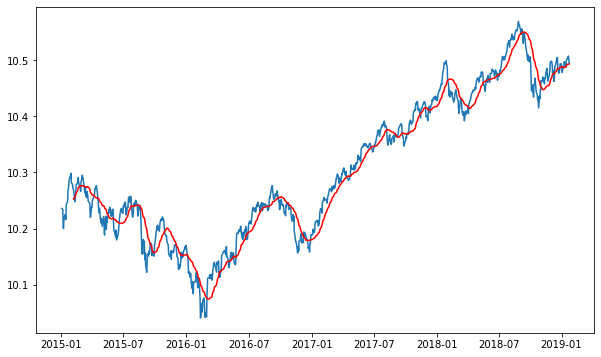

In [48]:
train_log = np.log(train_df['close']) 
test_log = np.log(test_df['close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red');

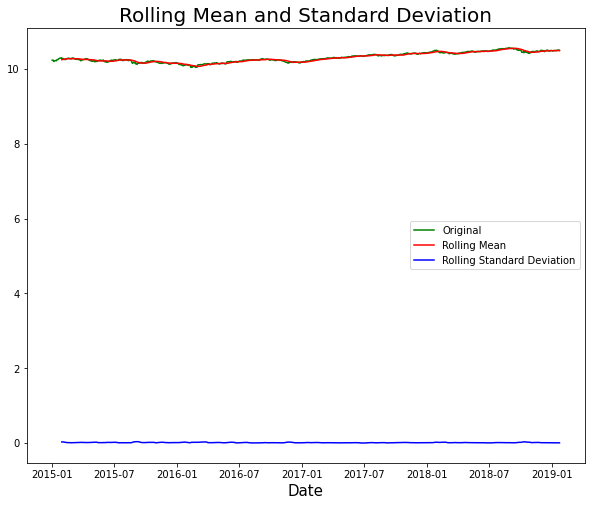

Results of dickey fuller test
ADF Test Statistic : -0.5063496560053629
p-value : 0.8907714361315964
#Lags Used : 6
Number of Observations Used : 993
Weak evidence against null hypothesis, time series is non-stationary 


In [49]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

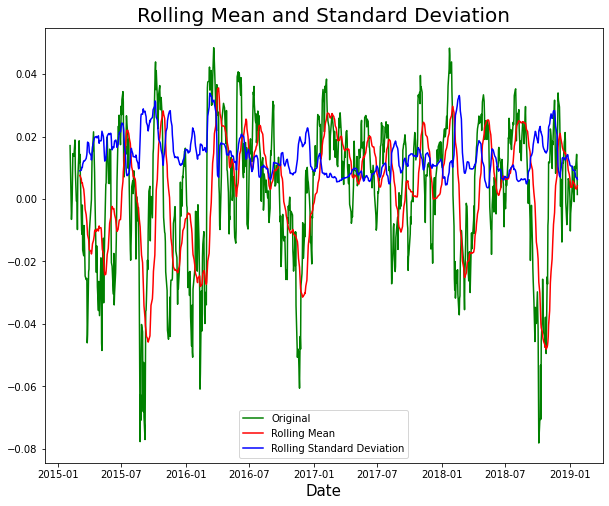

Results of dickey fuller test
ADF Test Statistic : -6.541831419707252
p-value : 9.30530878288461e-09
#Lags Used : 3
Number of Observations Used : 973
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [50]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

###STEP 5 - Auto Arima to make predictions

In [51]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test_df))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6695.839, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6700.141, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6701.586, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6701.681, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6701.204, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6700.257, Time=0.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6699.799, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6697.783, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6702.851, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6701.366, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6700.941, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6702.758, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6698.902, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.082 seconds


###STEP 6 - Making Predictions

Text(0, 0.5, 'Actual Stock Price')

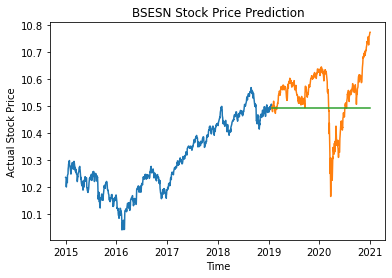

In [52]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [53]:
# calculate root mean squared error

testScore = np.sqrt(mean_squared_error(test_log, predictions))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  0.1121930327778079  RMSE


## Hybrid model for Numerical and Textual Analysis
###STEP 1 - Importing the Dataset

In [55]:
#Importing the Dataset
columns = ['Date','Category','News']
news_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/india-news-headlines.csv', names = columns)
news_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


###STEP 2 - Text preprocessing

In [56]:
news_df.drop(0, inplace=True)
news_df.drop('Category', axis = 1, inplace=True)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [57]:
# Restructuring the date format
news_df['Date'] = pd.to_datetime(news_df['Date'],format= '%Y %m %d')
news_df

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


In [58]:
#Grouping the headlines for each day
news_df['News'] = news_df.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace = True, drop = True)
news_df

,Date,News
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...


In [59]:
news_df['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7258    #BigInterview! Dhritiman Chatterjee: Nobody da...
7259    Horoscope Today; 28 December 2020: Check astro...
7260    Man recovers charred remains of 'thief' from h...
7261    Numerology Readings 30 December 2020: Predicti...
7262    Horoscope Today; 31 December 2020: Check astro...
Name: News, Length: 7263, dtype: object

###STEP 3 - Adding subjectivity and polarity Scores

In [60]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [61]:
#Adding subjectivity and polarity columns
news_df['Subjectivity'] = news_df['News'].apply(getSubjectivity)
news_df['Polarity'] = news_df['News'].apply(getPolarity)
news_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


###STEP 4 - Visualizing the polarity and Subjectivity scores

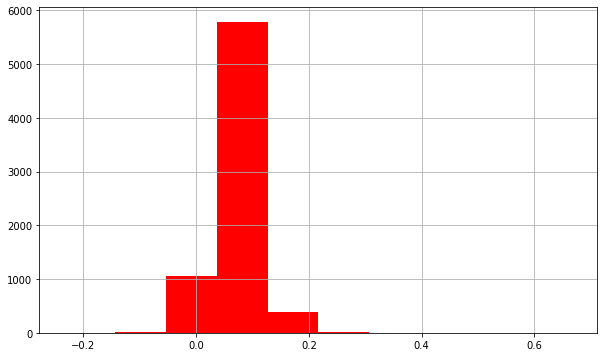

In [62]:
plt.figure(figsize = (10,6))
news_df['Polarity'].hist(color = 'red');

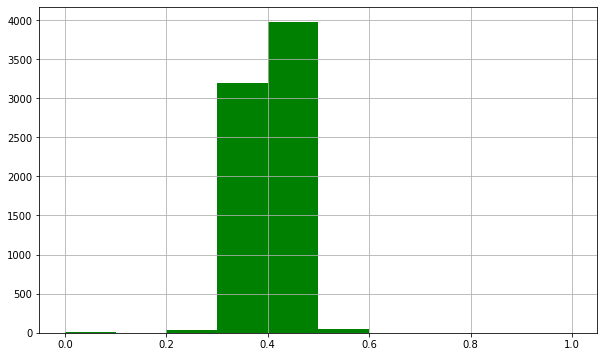

In [63]:
plt.figure(figsize = (10,6))
news_df['Subjectivity'].hist(color = 'green');

###STEP 5 - Performing Sentiment Analysis over the news Headlines

In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['News']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['News']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['News']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['News']]
news_df

###STEP 6 - Merging the Historical and Textual data

In [ ]:
df_merge = pd.merge(bsesn_df, news_df, how='inner', on='Date')
df_merge

###STEP 7 - Create Dataset for Model Training

In [ ]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

###STEP 8 - Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

In [ ]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']
y.head()

In [ ]:
X.head()

###STEP 9 - Split the Dataset into Train & Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

In [ ]:
x_train[:10]

###STEP 10 - Machine Learning Models

####Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])

In [ ]:
#mean square error
rfr_msr = mean_squared_error(predictions,y_test))
rfr_msr

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
rfr_acc = accuracy_score(y_test, predictions)
print(rfr_acc)

####AdaBoost Regressor

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
#mean square error
abr_msr = mean_squared_error(predictions,y_test))
abr_msr

In [ ]:
#accuracy score
abr_acc = accuracy_score(y_test, predictions)
print(abr_acc)

####Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])

In [ ]:
#mean square error
dtr_msr = mean_squared_error(predictions,y_test))
dtr_msr

In [ ]:
#accuracy score
dtr_acc = accuracy_score(y_test, predictions)
print(dtr_acc)

####LGBM Regressor

In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

In [ ]:
predictions = lgb.predict(x_test)

In [ ]:
#mean square error
lgbm_msr = mean_squared_error(predictions,y_test))
lgbm_msr

In [ ]:
#accuracy score
lgbm_acc = accuracy_score(y_test, predictions)
print(lgbm_acc)

####XGB Regressor

In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

In [ ]:
predictions = xgb.predict(x_test)

In [ ]:
#mean square error
xgbr_msr = mean_squared_error(predictions,y_test))
xgbr_msr

In [ ]:
#accuracy score
xgbr_acc = accuracy_score(y_test, predictions)
print(xgbr_acc)